<a href="https://colab.research.google.com/github/Amey-Thakur/PYTHON-CRASH-COURSE/blob/main/PYTHON_CRASH_COURSE_DAY_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 10**

**Random Forest**

Its a type of supervised machine learning alogorithm based on ensemble learning. The random forest combines multiple algorithm of the same type i.e, multiple decision trees, resulting in forest of trees, hence the name Random Forest

**Problem Statement**

To predict the gas consumption(in millions of gallons) in 48 of the US states based on petrol tax(in cents), per capita income(in dollars), paved highways(in miles) and the proportion of population with the driving license

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#import dataset, assign it to dataset and view the dataset
dataset = pd.read_csv('/content/petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
#Prepare dataset for training, X = 0:4 columns, Y=4th column
X = dataset.iloc[:, 0:4]  #feature variable
Y = dataset.iloc[:, 4]    #target variable

In [4]:
#divide the data in to training and test using sklearn's library
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
#Lets train the algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [7]:
#Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  48.33899999999999
Mean Squared Error:  3494.2330150000003
Root Mean Squared Error:  59.112037818028234


In [8]:
print(y_pred)

[569.205 493.25  601.31  592.405 607.655 609.635 590.265 570.74  471.455
 509.78 ]


In [9]:
Y_test.shape

(10,)

**Support Vector Machines(SVM)**

It is a type of supervised machine learning classification algorithm, which tries to find a boundary that divides the data in such a way that the misclassification error can be minimized.

**Problem statement**

To classify Muffins and Cupcakes using SVM

In [10]:
#import libaries, numpy, pandas and sklearn's svm
import pandas as pd
import numpy as np
from sklearn import svm

#libraries for visualization, matplotlib and seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(font_scale=1.2)

%matplotlib inline

In [11]:
#load the dataset as recipes variable
recipes = pd.read_csv('/content/recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


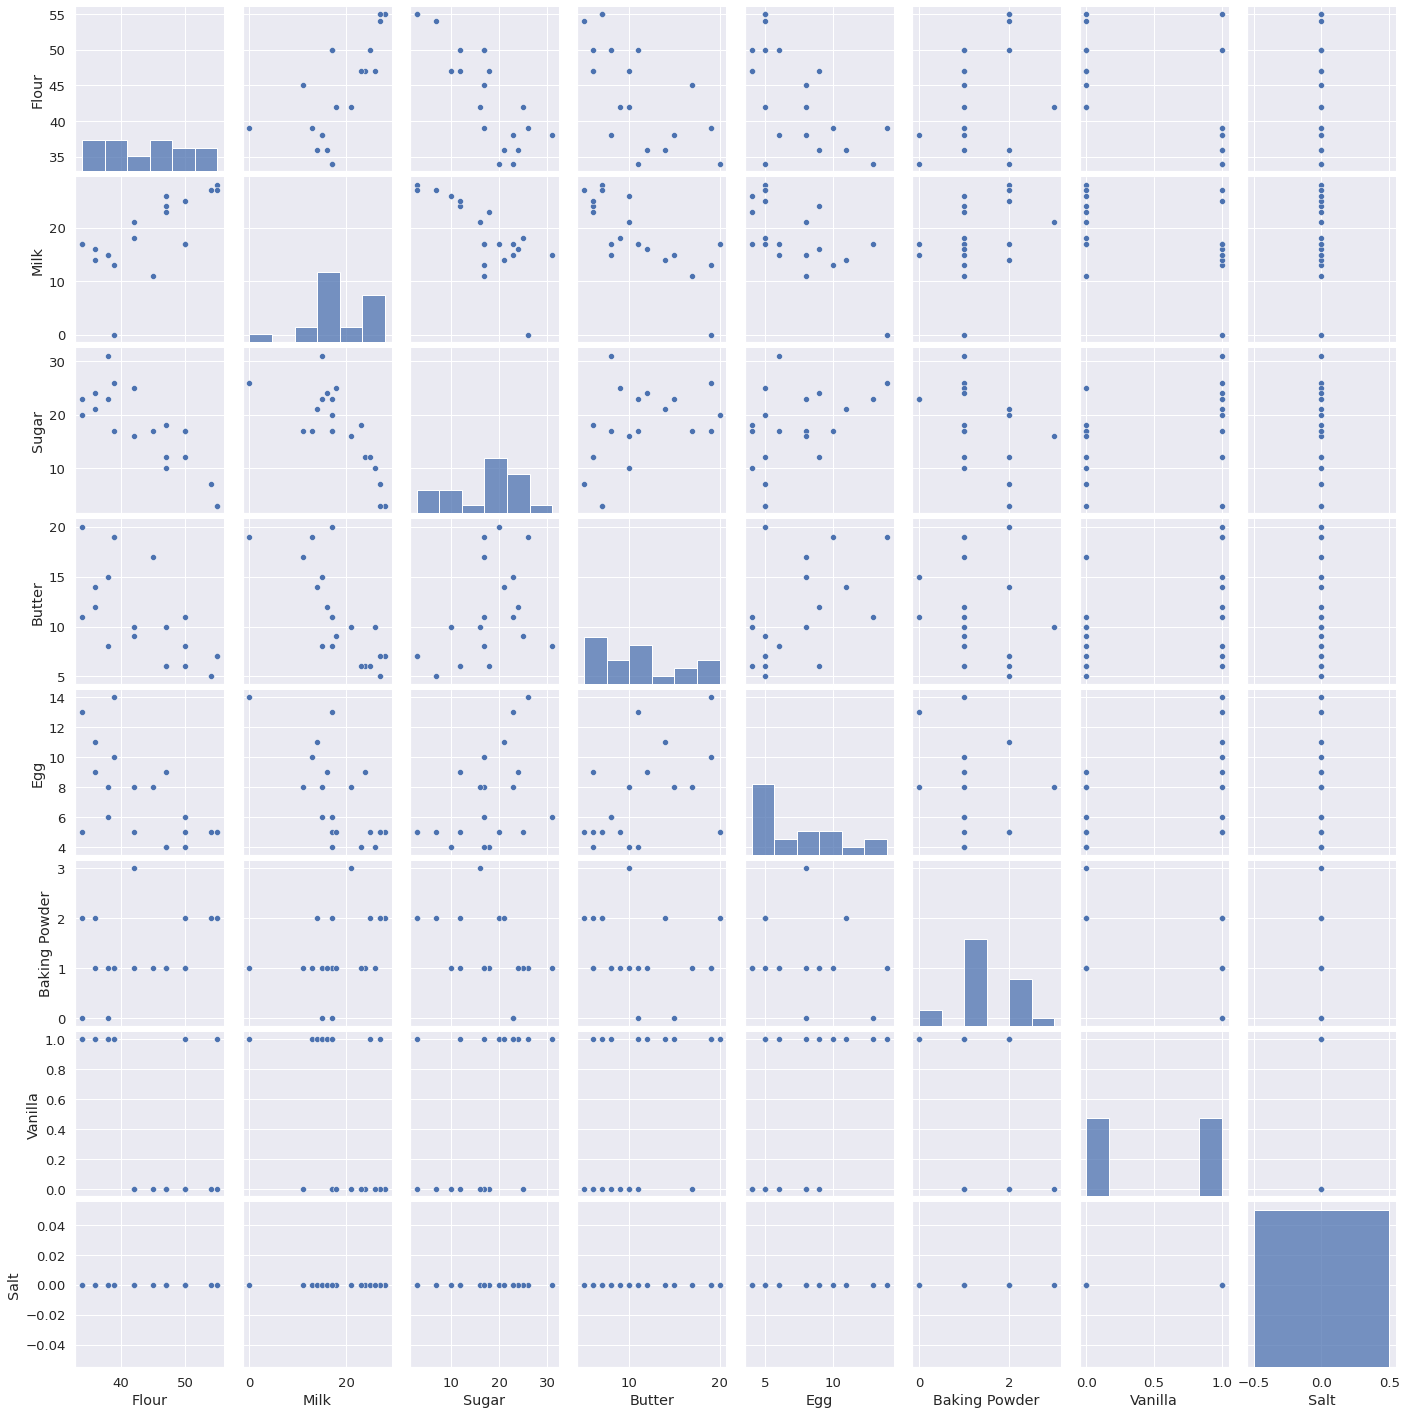

In [12]:
sns.pairplot(recipes)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


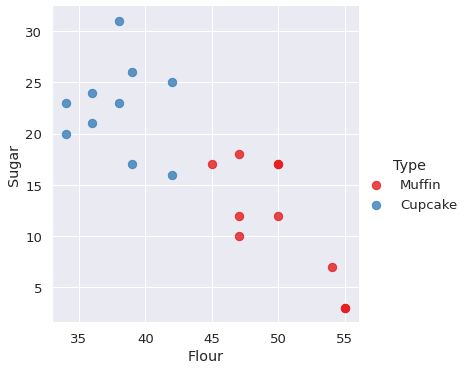

In [13]:
#plot the two ingrdients using sns.lmplot('Flour', 'Sugar',data=recipes,hue='Type', palette='Set1',fit_reg=False,scatter_kws={'s':70})
sns.lmplot('Flour', 'Sugar',data=recipes,hue='Type', palette='Set1',fit_reg=False,scatter_kws={'s':70});

In [14]:
#specifying inputs to the model as ingredients, convert it to matrix
ingredients = recipes[['Flour','Sugar']].to_numpy()
type_label = np.where(recipes['Type'] == 'Muffin',0,1)

In [15]:
#feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [16]:
#lets fit the model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
#lets visualize the results
#Get the seperating hyperplane
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0])/w[1]

In [18]:
#plot the parallel to the seperating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up =  a * xx + (b[1] - a * b[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


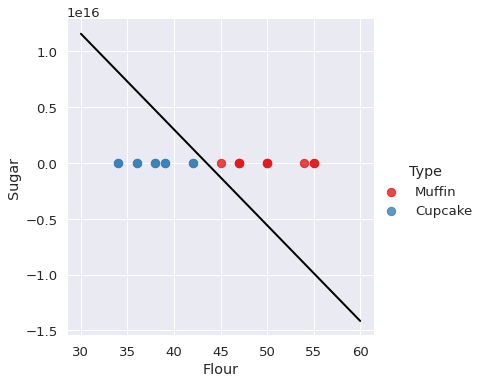

In [19]:
#lets plot the hyperplane
sns.lmplot('Flour', 'Sugar',data=recipes,hue='Type', 
           palette='Set1',fit_reg=False,
           scatter_kws={'s':70});
plt.plot(xx,yy,linewidth=2,color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


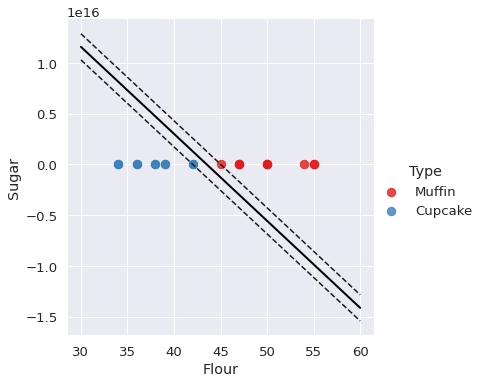

In [20]:
#lets plot the margins and support vectors
sns.lmplot('Flour', 'Sugar',data=recipes,hue='Type', 
           palette='Set1',fit_reg=False,
           scatter_kws={'s':70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up, 'k--')

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s= 80, facecolors= 'none')

In [21]:
#lets predict the new case
#lets define a function to guess when a recipe is muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
  if(model.predict([[flour,sugar]])) == 0:
    print('You\'re looking at a muffin recipe')
  else:
    print('You\'re looking at a cupcake recipe')

In [22]:
#predict for 50 parts of flour and 20 parts of sugar
muffin_or_cupcake(50,20)

You're looking at a muffin recipe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


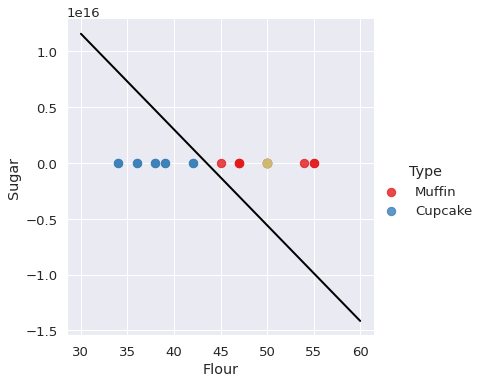

In [23]:
#lets plot the new point visually to see where the point lies
sns.lmplot('Flour', 'Sugar',data=recipes,hue='Type', 
           palette='Set1',fit_reg=False,
           scatter_kws={'s':70});
plt.plot(xx,yy,linewidth=2,color='black')

plt.plot(50,20,'yo',markersize='9')